#**<center> <h1>IDENTIFICACIÓN Y CLASIFICACIÓN DE PLACAS</h1> </center>**
<center><img src="https://minas.medellin.unal.edu.co/images/Escudo_color.png" width="300"></center>
<center> <t>Participantes:<t>

 </center>
 <center>   Santiago Rivera Mejia</center>
  <center>   Juan José Ospina Eazo</center>
   <center>   Emmanuel Alberto Mejia Arango</center>
    <center>Sebastian Quiroz Montoya </center>
     <center>   John fredy Guerra</center>





# Introducción
<p style='text-align: justify'>
 <p>

En este proyecto se ha optado por utilizar un dataset de vehiculos obtenido de Kaggle, del cual hicimos un proceso para el analisis de las placas a traves de filtros utiles para una visualizacion optima de las imagenes

Se planteo la distincion y clasificacion de placas segun los aspectos vsibiles en las mismas, caracteres numericos y letras

**Justificación:** La tematica de placas tiene suma importancia en diversos campos cotidianos, desde la seguridad, el almacenamiento de datos para diversos ambitos como parqueadores, o gubernamentales, es por esto que el tema logra llamarnos la atencion y decidimos trabajar en el

El dataset seleccionado nos permitio trabajar con diversas caracteristicas que en otras placas no podiamos encontrarlas juntas, como letras intercaladas, en diferentes posiciones, y tamaños, lo que nos permitio ampliar nuestra vision inicial sobre el objetivo

**Objetivos:**
Lograr la clasificación de placas segun sus caracteristicas visuales, como lo son el tipo de placa (Particular, Servicio, etc..), Region del vehiculo, peso, o cualquier caracteristica regional, o gubernamental presente en la misma

**Importación de librerías**

Instalamos librerias que necesitaremos y no se encuentran por defecto en colab.

Las cuales serian:

**kaggle**: la cual sirve para poder obtener el dataset desde la misma pagina de kaggle

**easyocr**: Es una libreria para reconocimiento óptico de caracteres

In [ ]:
!pip install kaggle easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importación  de todas las librerias que vamos a usar

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from skimage.filters import sobel_v,sobel_h, sobel
from skimage import color
from skimage.filters.edges import prewitt
from skimage.segmentation import clear_border
import pytesseract
import easyocr



## **Configuración previa para la descarga del dataset desde Kaggle**

Subimos el archivo de "configuración" o el "api token" adquirido anteriormente desde kaggle y ademas le damos permisos de "rw" (lectura y escritura)

In [ ]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


Descarga y extracción del dataset

In [ ]:
!kaggle datasets download -d xairete/car-plates-ocr
!mkdir dataset
!unzip car-plates-ocr.zip -d dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: dataset/data/train/5499.bmp  
  inflating: dataset/data/train/55.bmp  
  inflating: dataset/data/train/550.jpg  
  inflating: dataset/data/train/5500.jpg  
  inflating: dataset/data/train/5501.bmp  
  inflating: dataset/data/train/5502.jpg  
  inflating: dataset/data/train/5503.jpg  
  inflating: dataset/data/train/5504.jpg  
  inflating: dataset/data/train/5505.jpg  
  inflating: dataset/data/train/5506.jpg  
  inflating: dataset/data/train/5507.jpg  
  inflating: dataset/data/train/5508.jpg  
  inflating: dataset/data/train/5509.jpg  
  inflating: dataset/data/train/551.jpg  
  inflating: dataset/data/train/5510.jpg  
  inflating: dataset/data/train/5511.jpg  
  inflating: dataset/data/train/5512.jpg  
  inflating: dataset/data/train/5513.jpg  
  inflating: dataset/data/train/5514.jpg  
  inflating: dataset/data/train/5515.jpg  
  inflating: dataset/data/train/5516.jpg  
  inflating: dataset/data/train/5517.jpg

## **Analisís del dataset**

In [ ]:
ruta_plates_train = '/content/dataset/data/train'
ruta_plates_test = '/content/dataset/data/test'

In [ ]:
train_plates_dir = os.path.join(ruta_plates_train)
test_plates_dir = os.path.join(ruta_plates_test)

In [ ]:
train_plates_nombres = os.listdir(train_plates_dir)
print(train_plates_nombres[:10])

test_plates_nombres = os.listdir(test_plates_dir)
print(test_plates_nombres[:10])

train_plates_nombres.sort()
test_plates_nombres.sort()

['17417.jpg', '3622.jpg', '7101.jpg', '14969.jpg', '3729.jpg', '10543.jpg', '4086.jpg', '8281.bmp', '1391.jpg', '17767.jpg']
['1391.jpg', '3088.jpg', '1845.jpg', '593.jpg', '544.jpg', '280.jpg', '2012.bmp', '923.jpg', '152.jpg', '581.jpg']


In [ ]:
#Imprimir la cantidad de imagenes
print('Imagenes de entrenamiento:', len(train_plates_nombres))
print('Imagenes de prueba:', len(test_plates_nombres))

print("En total nuestro dataset consiste de {} imágenes".format(len(train_plates_nombres) + len(test_plates_nombres)))

Imagenes de entrenamiento: 25633
Imagenes de prueba: 3188
En total nuestro dataset consiste de 28821 imágenes


## **Implementación del dataset**

Generamos una pequeña muestra de las imagenes

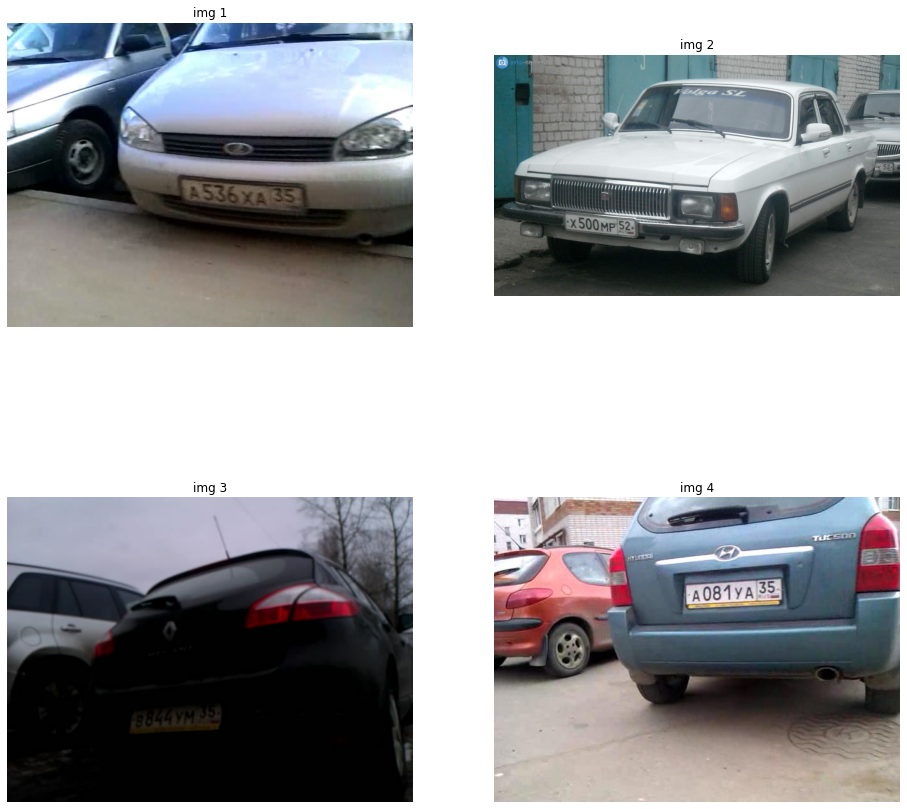

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

pic_index = 176
train_pic = [os.path.join(train_plates_dir, fname) 
                for fname in train_plates_nombres[pic_index-4:pic_index]]

for i, img_path in enumerate(train_pic):
  sp = plt.subplot(2, 2, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(f'img {i+1}')

Mostramos la estructura de las imagenes (width, height, chanel)

(1396, 1733, 3)


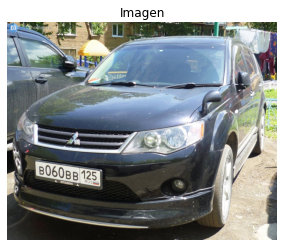

In [ ]:
img=os.path.join(train_plates_dir, train_plates_nombres[0])
img_train = mpimg.imread(img)

plt.imshow(img_train)
plt.title('Imagen')
plt.axis('off')
print(img_train.shape)

Mostramos los histogramas de cada imagen, en este caso solo utilizaremos 4 imágenes

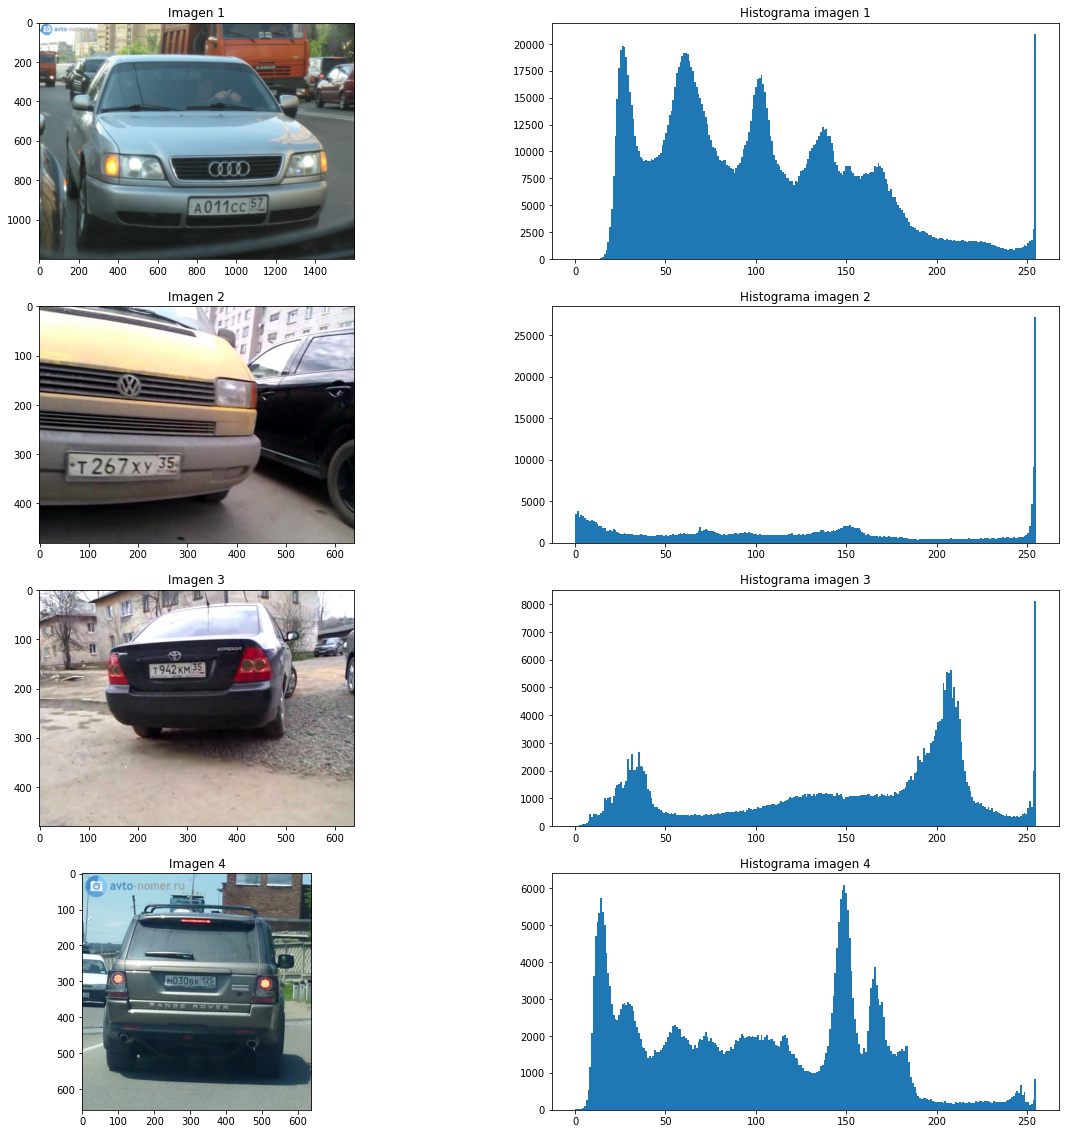

In [ ]:
img1= mpimg.imread(os.path.join(train_plates_dir, train_plates_nombres[17]))

img2= mpimg.imread(os.path.join(train_plates_dir, train_plates_nombres[101]))

img3= mpimg.imread(os.path.join(train_plates_dir, train_plates_nombres[1203]))

img4= mpimg.imread(os.path.join(train_plates_dir, train_plates_nombres[179]))

fig, arreglo_plots = plt.subplots(4,2, figsize=(20, 20))
arreglo_plots[0,0].set_title('Imagen 1')
arreglo_plots[0,0].imshow(img1)
arreglo_plots[0,1].set_title('Histograma imagen 1')
_ = arreglo_plots[0,1].hist(img1[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[1,0].set_title('Imagen 2')
arreglo_plots[1,0].imshow(img2)
arreglo_plots[1,1].set_title('Histograma imagen 2')
_ = arreglo_plots[1,1].hist(img2[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[2,0].set_title('Imagen 3')
arreglo_plots[2,0].imshow(img3)
arreglo_plots[2,1].set_title('Histograma imagen 3')
_ = arreglo_plots[2,1].hist(img3[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[3,0].set_title('Imagen 4')
arreglo_plots[3,0].imshow(img4)
arreglo_plots[3,1].set_title('Histograma imagen 4')
_ = arreglo_plots[3,1].hist(img4[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

## **Aplicación de filtros Gamma e Histogramas**

Pensamos en utilizar la correcion gamma, para tratar como de nivelar el brillo de todas las imagenes, ya que habían algunas muy oscuras

In [ ]:
def gamma_correction(img, a, gamma):
    
    img_copy = img.copy().astype(np.float32)
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

In [ ]:


def apply_f_on_rgb(img, f, args):
    
    res = np.zeros(img.shape, np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

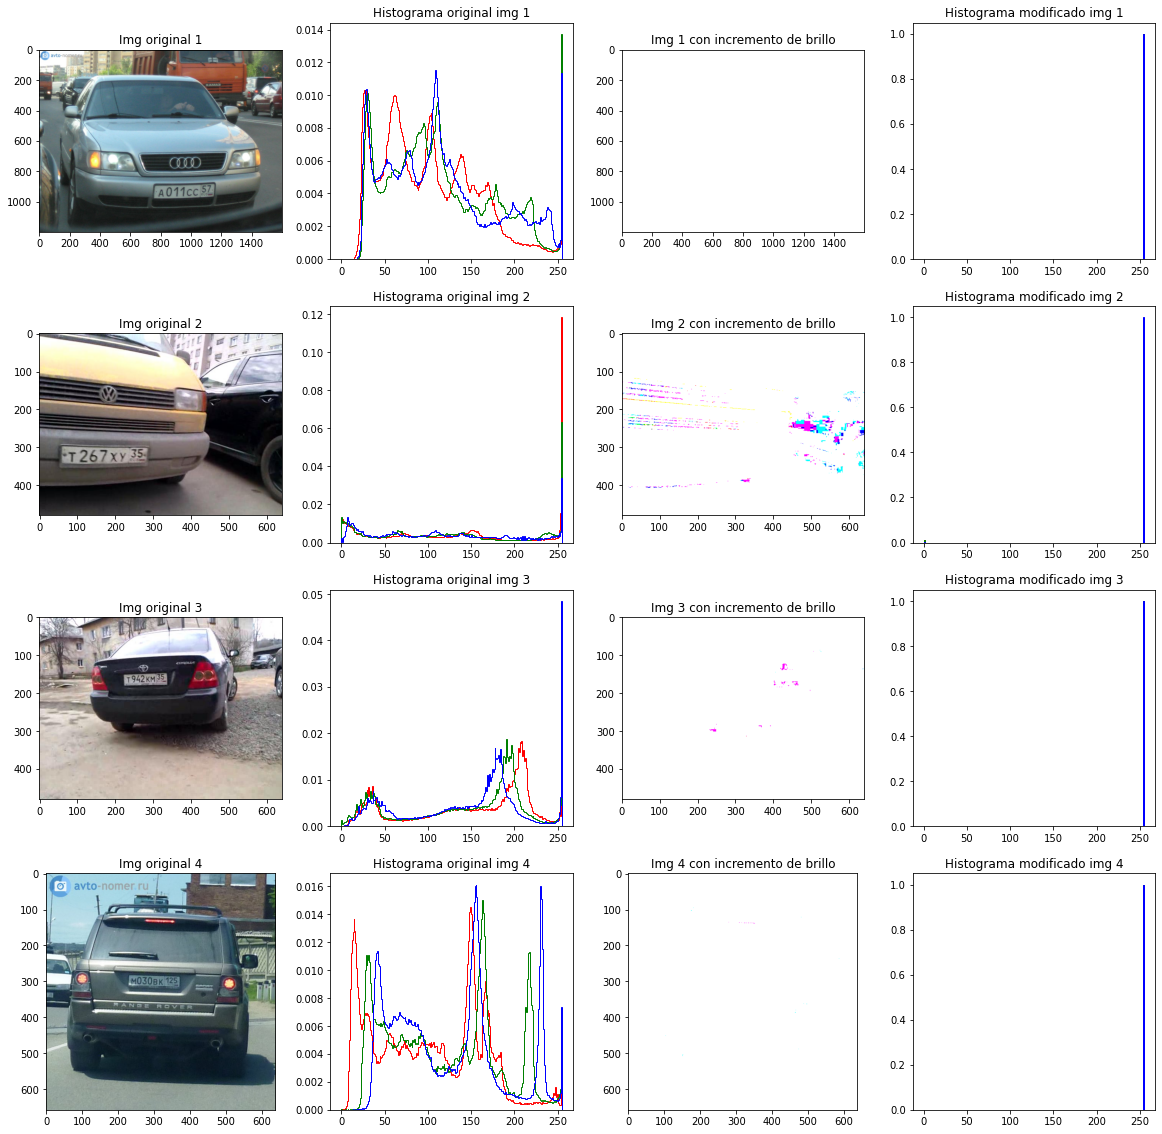

In [ ]:

a = 1
gamma = 0.5

res_brillante = apply_f_on_rgb(img3, gamma_correction, [a, gamma])

fig, arreglo_plots = plt.subplots(4,4, figsize=(20, 20))
colors = ('r','g','b')


for i, img in enumerate([img1, img2, img3, img4]):
  arreglo_plots[i,0].set_title(f'Img original {i+1}')
  arreglo_plots[i,0].imshow(img)


  arreglo_plots[i,1].set_title(f'Histograma original img {i+1}')
  for j,col in enumerate(colors):
      img_array_j = img[:,:,j].ravel()
      arreglo_plots[i,1].hist(img_array_j,histtype='step', bins=255, 
                              range=(0.0, 255.0),density=True, color=colors[j]) 

  res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

  arreglo_plots[i,2].set_title(f'Img {i+1} con incremento de brillo')
  arreglo_plots[i,2].imshow(res_brillante, cmap="gray")
  arreglo_plots[i,3].set_title(f'Histograma modificado img {i+1}')
  for j,col in enumerate(colors):
      img_array_j = res_brillante[:,:,j].ravel()
      arreglo_plots[i,3].hist(img_array_j,histtype='step', bins=255, 
                              range=(0.0, 255.0),density=True, color=colors[j])

Al final terminamos descartando esta implementacion, ya que aunque funcione pra imagenes muy oscuras, de igual forma nos va hacer perder detalles en imagenes que ya tuvieran su buen brillo.

## **Redimensionamiento de las imagenes**

Optaremos por aplicar un redimensionamiento a las imagens, para que todas queden lo mas parecidas en cuanto a dimensiones

In [ ]:
def resized(imgs):
  imgs_resized = []
  for img in imgs:
    h, w, _ = img.shape
    width = 600
    height = int(h * width/w) 
    dim = (width, height)
    
    
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)


    imgs_resized.append(resized)

  return imgs_resized

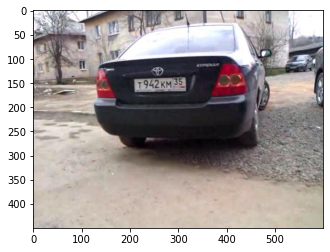

In [ ]:
original_imgs = [img1, img2, img3, img4]

resized_imgs = resized(original_imgs)




plt.imshow(resized_imgs[2])

## **Conversión a escalas de grises**

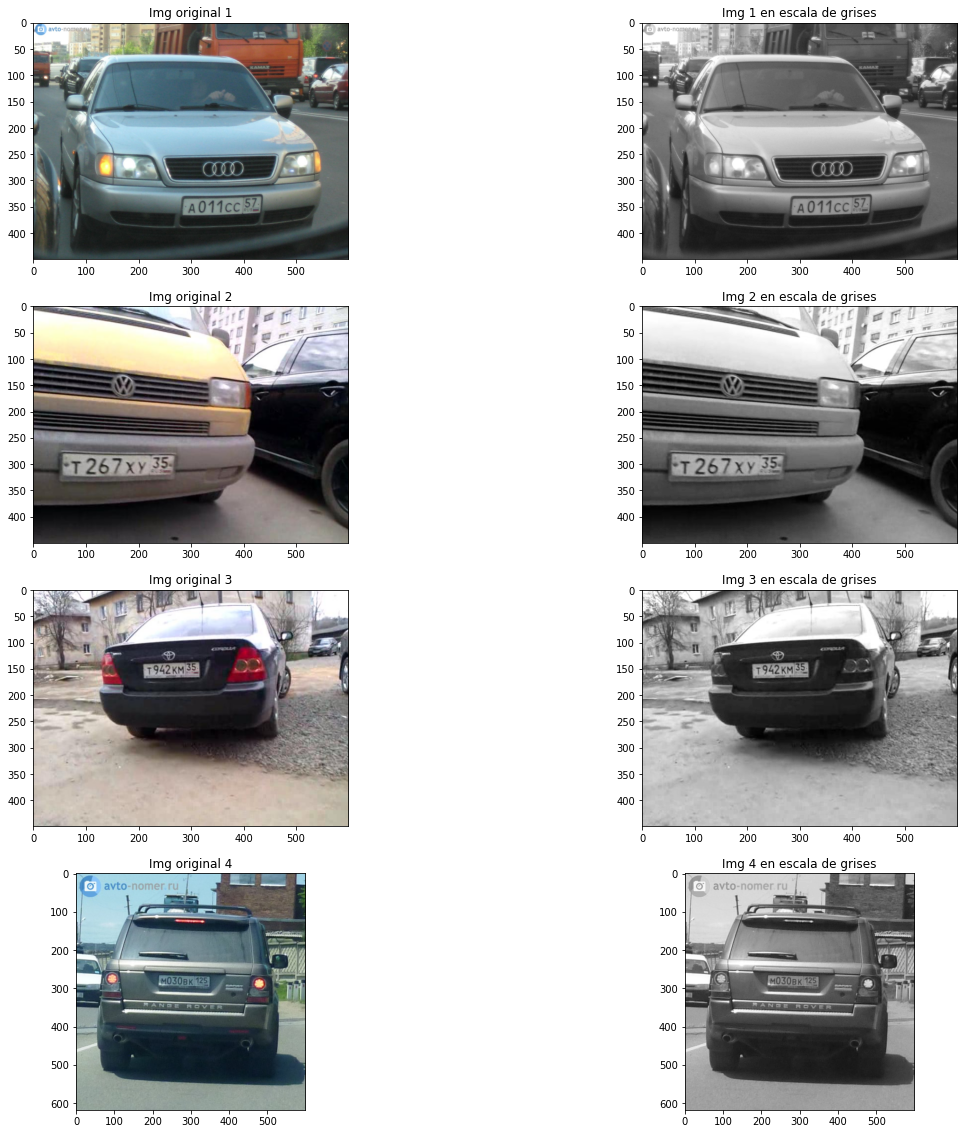

In [ ]:
gray_imgs = []

fig, arreglo_plots = plt.subplots(len(original_imgs),2, figsize=(20, 20))
for i, img in enumerate(resized_imgs):
  img_gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  arreglo_plots[i,0].set_title(f'Img original {i+1}')
  arreglo_plots[i,0].imshow(img, cmap="gray", vmin=0, vmax=255)


  arreglo_plots[i,1].set_title(f'Img {i+1} en escala de grises')
  arreglo_plots[i,1].imshow(img_gray_scale, cmap="gray", vmin=0, vmax=255)

  gray_imgs.append(img_gray_scale)

## **Ecualización de histogramas**

Para ecualización del histograma estaremos usando CLAHE por sus siglas en ingles (Contrast Limited Adaptive Histogram Equalization)

In [ ]:
def clhe(img): 
  clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
  
  cl1 = clahe.apply(img)
  return cl1

##Aplicación de filtros

In [ ]:
def apply_filtro_media(img):
  k_size= 5
  filtro_media= cv2.blur(img, (k_size, k_size))

  return filtro_media

In [ ]:
def apply_filtro_gaussiano(img):
  k_size= 5
  filtro_gaussiano= cv2.GaussianBlur(img, (k_size, k_size), 0)
  return filtro_gaussiano

In [ ]:
def apply_promedio_no_local(img):
  img= img.astype(np.uint8)

  img_size=np.shape(img)
  empty_img= np.zeros(img_size, dtype= np.uint8)
  img_dnoised= cv2.fastNlMeansDenoising(img, empty_img, 30, 7, 21) 
  

  return img_dnoised

In [ ]:

def plot_4x4_disminuir_ruido(imgs_gray):
  
  k_size= 5

  contador = 1
  plt.figure(figsize=(16,16))
  for i in range(1, 17):
      if contador<=4:
        img=  imgs_gray[0]
        etiqueta= "img 1"
      elif contador<=8:
        img= imgs_gray[1]
        etiqueta= "img 2"
      elif contador<=12:
        img= imgs_gray[2]
        etiqueta= "img 3"
      else:
        img= imgs_gray[3]
        etiqueta= "img 4"


      if i in (1, 5, 9, 13, 17):
        plt.subplot(4, 4, i)
        plt.imshow(clhe(img), cmap="Greys_r") 
        plt.title("Img. Ecualizada L.C {}".format(etiqueta))
        plt.axis('off')
      elif i in (2, 6, 10, 14, 18):
        plt.subplot(4, 4, i)
        plt.imshow(apply_filtro_media(clhe(img)), cmap='Greys_r') 
        plt.title("Filtro de la Media {}".format(etiqueta))
        plt.axis('off')

      elif i in (3, 7, 11, 15, 19):
        plt.subplot(4, 4, i)
        plt.imshow(apply_filtro_gaussiano(clhe(img)), cmap="Greys_r") 
        plt.title("Filtro de Gauss {}".format(etiqueta))
        plt.axis('off')

      else:
        plt.subplot(4, 4, i)
        plt.imshow(apply_promedio_no_local(clhe(img)), cmap="Greys_r")  
        plt.title("Filtro Promedio No-Local {}".format(etiqueta))
        plt.axis('off')

      contador=contador+1


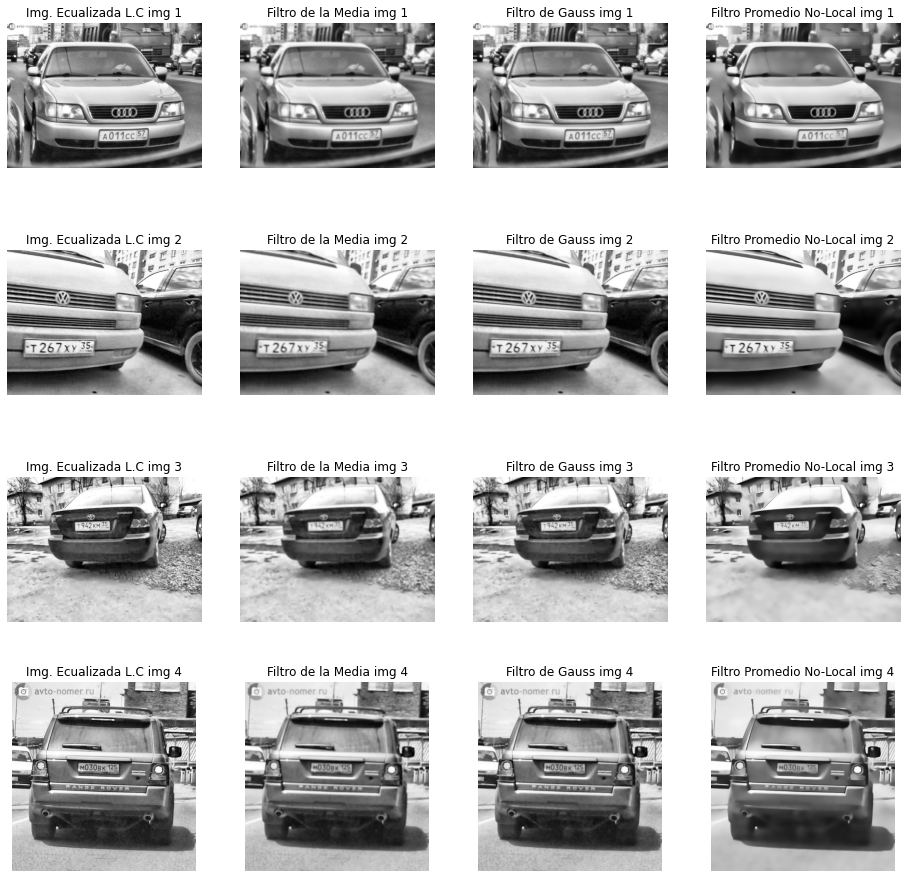

In [ ]:
plot_4x4_disminuir_ruido(gray_imgs)

Por lo que tanto nos quedaremos con el filtro de promedio no local 

Text(0.5, 1.0, 'Histograma Imágen mejorada ')

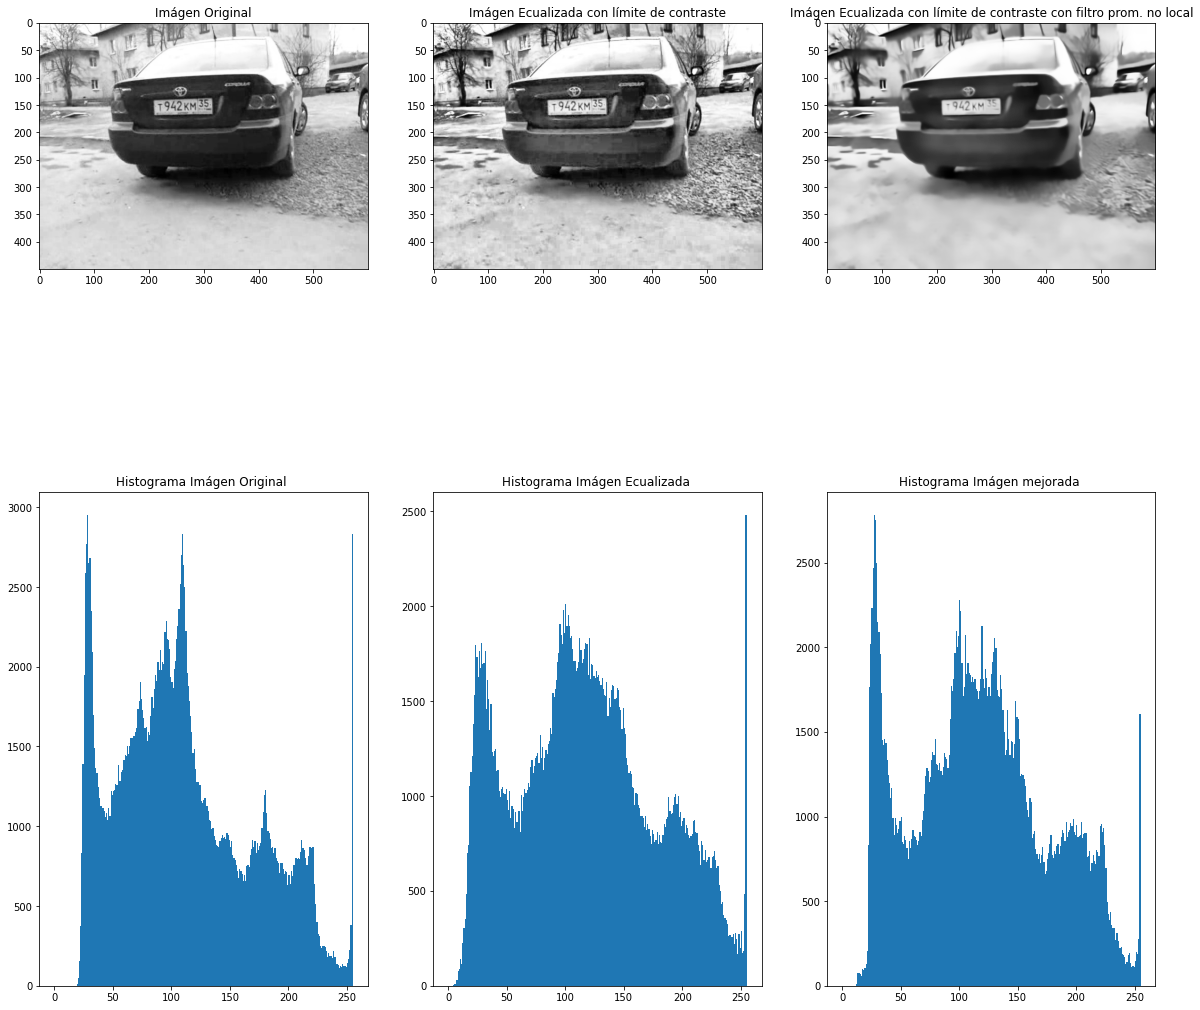

In [ ]:

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(2,3, figsize=(20,20))


plt.title("Resultado de preprocesamiento")
ax1.imshow(gray_imgs[2], cmap="Greys_r") 
ax1.set_title("Imágen Original")

ax2.imshow(clhe(gray_imgs[2]), cmap="Greys_r")
ax2.set_title("Imágen Ecualizada con límite de contraste")

ax3.imshow(apply_promedio_no_local(clhe(gray_imgs[2])), cmap="Greys_r")
ax3.set_title("Imágen Ecualizada con límite de contraste con filtro prom. no local")


ax4.hist(gray_imgs[0].ravel(), bins=255, range=(0.0, 255.0))
ax4.set_title("Histograma Imágen Original ")

ax5.hist(clhe(gray_imgs[0]).ravel(), bins=255, range=(0.0, 255.0))
ax5.set_title("Histograma Imágen Ecualizada ")

ax6.hist(apply_promedio_no_local(clhe(gray_imgs[0])).ravel(), bins=255, range=(0.0, 255.0))
ax6.set_title("Histograma Imágen mejorada ")

# **Segmentación**
Inicialmente se definen funciones para la aplicación de los distintos filtros

In [ ]:

def img_scale(img, value_range = [0,255]):
  return (value_range[1] - value_range[0])*(img - np.min(img))/(np.max(img)-np.min(img)) + value_range[0]
    
def aplicarFiltroSobel(imagen):
  imagen = imagen.astype(np.float32)
  imagen = color.rgb2gray(imagen)

  gradiente_x = cv2.Sobel(imagen, ddepth=-1, dx = 1, dy = 0, ksize = 3)
  gradiente_y = cv2.Sobel(imagen, ddepth=-1, dx = 0, dy = 1, ksize = 3)

  #Calcula la magnitud del sobel, por definición
  magnitud_sobel = np.sqrt(np.power(gradiente_x,2)+np.power(gradiente_y,2))

  #Realizar el escalamiento de la imagen
  magnitud_sobel = img_scale(magnitud_sobel)

  return magnitud_sobel


def aplicarFiltroPrewitt(imagen):
  imagen = imagen.astype(np.float32)
  imagen = color.rgb2gray(imagen)

  prewitt_x=np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]],dtype=int)

  prewitt_y=np.array([[-1,-1,-1],
                    [0,0,0],
                    [1,1,1]],dtype=int)

  imgc1 = cv2.filter2D(imagen, ddepth=-1, kernel=prewitt_x)
  imgc2 = cv2.filter2D(imagen, ddepth=-1, kernel= prewitt_y)

  magnitud_prewitt = np.sqrt(np.power(imgc1,2)+np.power(imgc2,2))

  magnitud_prewitt = img_scale(magnitud_prewitt)

  return magnitud_prewitt


def aplicarFiltroLaplaciano(imagen):
  mask1 = np.array([[-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]])

  laplace_filtered = cv2.filter2D(imagen, ddepth = -1, kernel=mask1)
  return laplace_filtered


def aplicarFiltroDeCanny(imagen):
  sigma = 15

  result = cv2.GaussianBlur(imagen, (3,3), sigma)

  result = cv2.Canny(imagen, threshold1= 100, threshold2 = 180)
  return result

##3.1. Extracción de bordes

A continuación se realiza una comparación entre algunos fitros para la extracción de bordes. Aunque a priori los filtros de Sobel y Prewitt son los que captan más información, esta se degrada tras realizar el proceso de umbralización, por lo tanto se elige el filtro de Canny debido a que este es el que mejor cierra los contornos y el que mejor conserva la información durante el proceso.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


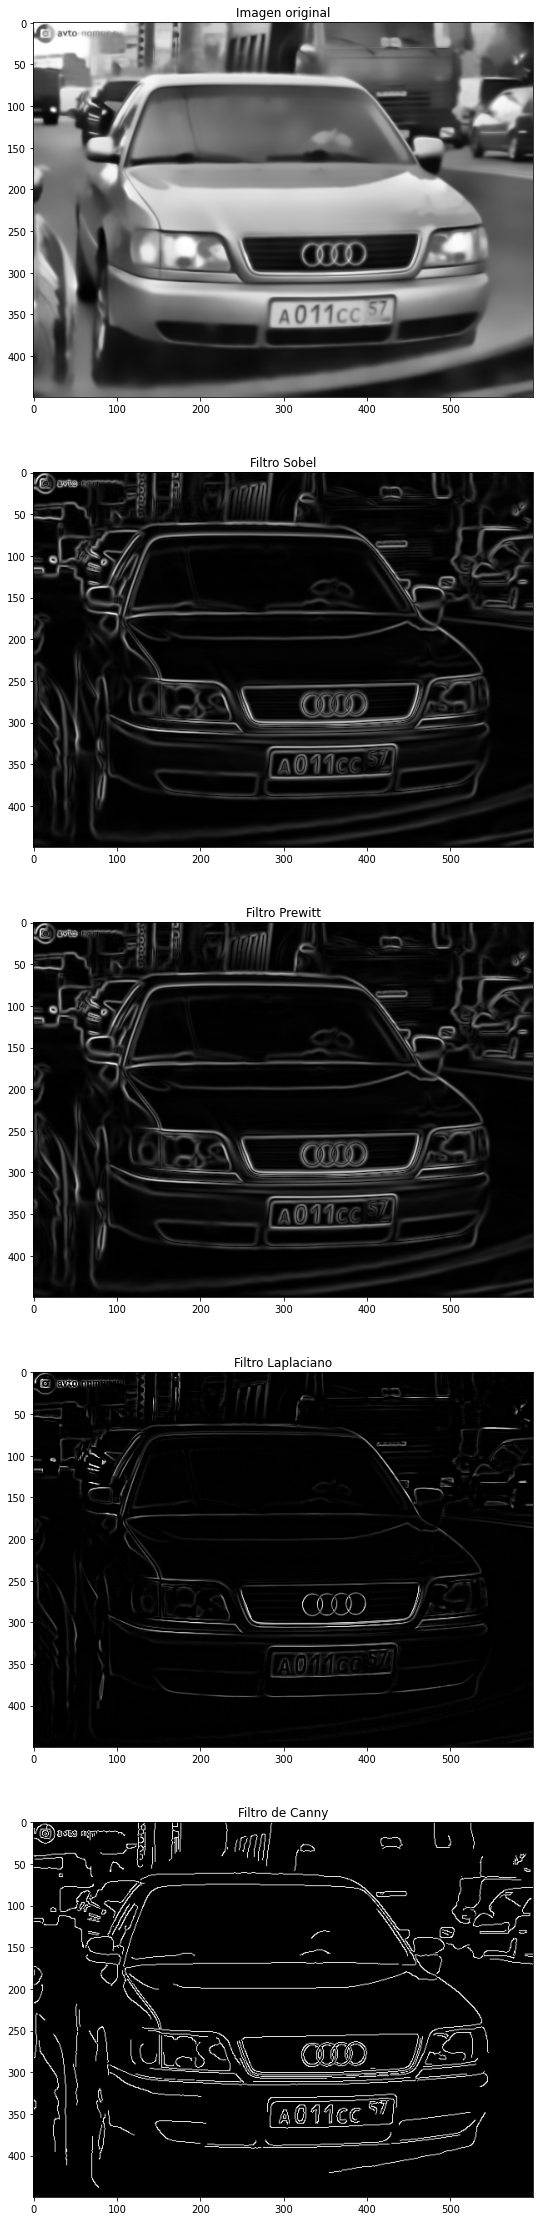

In [ ]:
img = apply_promedio_no_local(clhe(gray_imgs[0]))

fig2, ax = plt.subplots(5,1, figsize=(35, 40))

ax[0].set_title('Imagen original')
ax[0].imshow(img, cmap='gray')

ax[1].set_title('Filtro Sobel')
ax[1].imshow(aplicarFiltroSobel(img), cmap='gray')

ax[2].set_title('Filtro Prewitt')
ax[2].imshow(aplicarFiltroPrewitt(img), cmap='gray')

ax[3].set_title('Filtro Laplaciano')
ax[3].imshow(aplicarFiltroLaplaciano(img), cmap='gray')

ax[4].set_title('Filtro de Canny')
ax[4].imshow(aplicarFiltroDeCanny(img), cmap='gray')

##3.2. Umbralización

Se procede a umbralizar con el fin de segmentar binariamente la imagen, de modo que se diferencien claramente los bordes respecto al resto de esta. Adicionalmente se realizan una leve dilatación con el fin de remarcar aún más los bordes y poder identificar de mejor de manera el contorno de las placas y los símbolos contenidos en esta.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


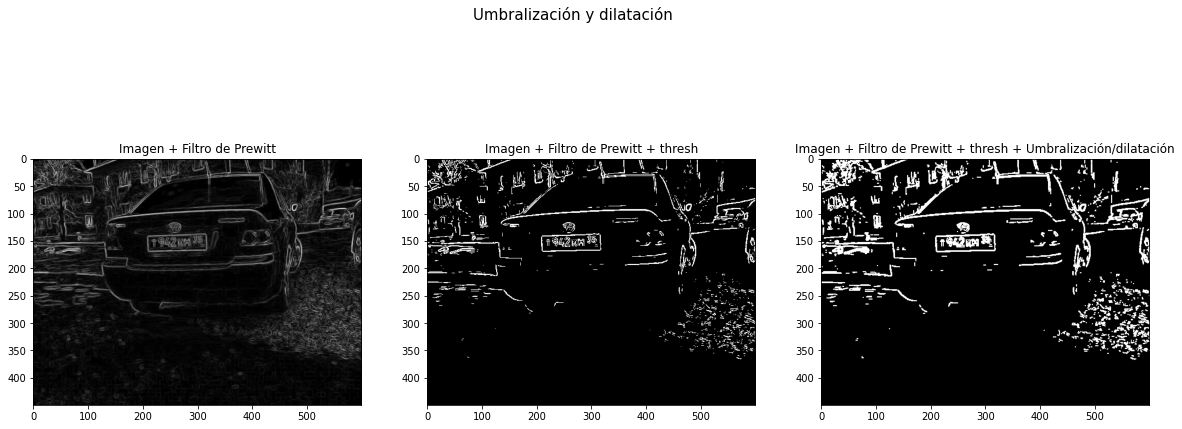

In [ ]:
img_con_filtro = aplicarFiltroPrewitt(clhe(gray_imgs[2]))
ret, thresh = cv2.threshold(img_con_filtro, 80, 255, cv2.THRESH_BINARY)

kernel = np.ones((2,2), np.uint8)  
img_con_umbralizacion = cv2.dilate(thresh, kernel, iterations=1)


fig, ax = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle("Umbralización y dilatación", fontsize=15)

ax[0].set_title('Imagen + Filtro de Prewitt')
ax[0].imshow(img_con_filtro, cmap='gray')

ax[1].set_title('Imagen + Filtro de Prewitt + thresh')
ax[1].imshow(thresh, cmap='gray')

ax[2].set_title('Imagen + Filtro de Prewitt + thresh + Umbralización/dilatación')
ax[2].imshow(img_con_umbralizacion, cmap='gray')

A partir de este proceso de segmentación se obtiene una imagen binaria con la cual se puede proceder a identificar y clasificar las placas que allí se tienen, ya sea mediante otros algoritmos de procesamiento de imágenes como la búsqueda de contornos o usando herramientas más robustas como por ejemplo las redes neuronales convolucionales.

# **Analisis de contornos**





## **Aplicando treshold**





Aplicamos la función treshold de opencv, para tener nuestra imagen en terminos de solo pixeles negros y blancos

In [ ]:
def apply_threshold(imgs):
  threshold_imgs = []
  for img in imgs:
    thresh = cv2.threshold(apply_promedio_no_local(clhe(img)), 125, 255, cv2.THRESH_BINARY)[1]

    threshold_imgs.append(thresh)

  return threshold_imgs

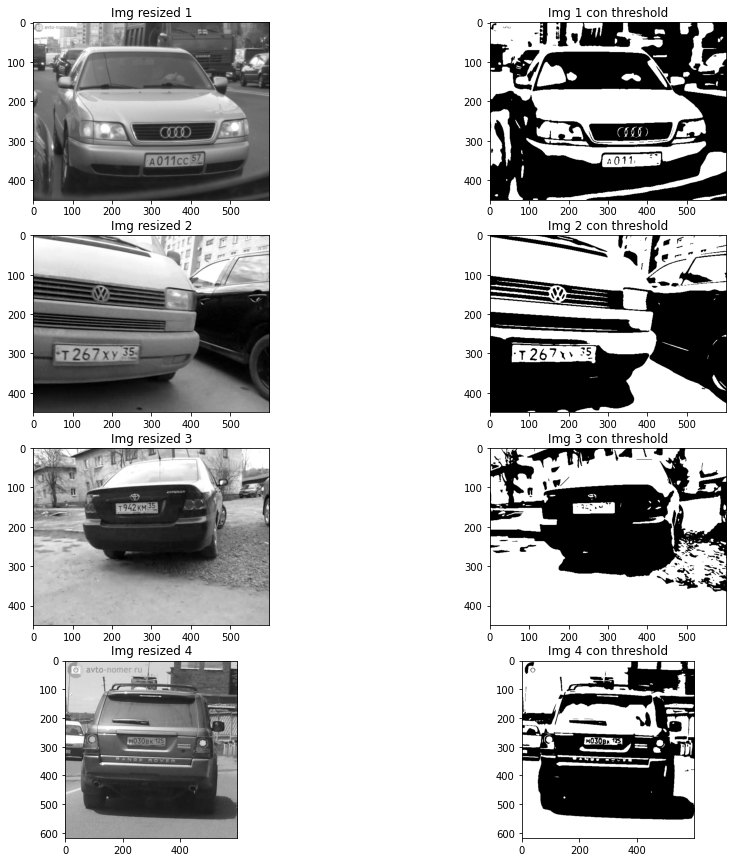

In [ ]:
threshold_imgs = apply_threshold(gray_imgs)

fig, arreglo_plots = plt.subplots(len(original_imgs),2, figsize=(15, 15))
for i in range(len(threshold_imgs)):

  arreglo_plots[i,0].set_title(f'Img resized {i+1}')
  arreglo_plots[i,0].imshow(gray_imgs[i], cmap="gray", vmin=0, vmax=255)


  arreglo_plots[i,1].set_title(f'Img {i+1} con threshold')
  arreglo_plots[i,1].imshow(threshold_imgs[i], cmap="gray", vmin=0, vmax=255)

## **Buscamos contornos**

Luego de esto aplicamos la funcion de "findContours" que como bien lo dice su nombre nos ayudara a encontrar contornos en la imagen 

In [ ]:
def find_contours(imgs):
  contours_imgs = []
  for i, img in enumerate(imgs):
    contours = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

    contours_imgs.insert(i, contours)
  return contours_imgs

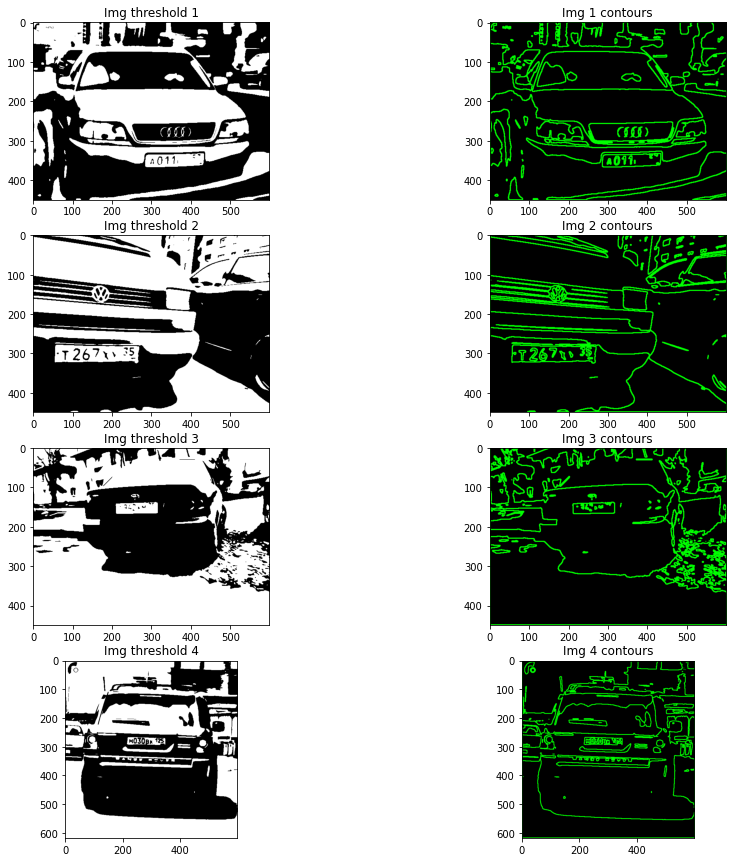

In [ ]:

contours_imgs = find_contours(threshold_imgs)

view_contours_imgs = []

fig, arreglo_plots = plt.subplots(len(original_imgs),2, figsize=(15, 15))
for i in range(len(contours_imgs)):

  arreglo_plots[i,0].set_title(f'Img threshold {i+1}')
  arreglo_plots[i,0].imshow(threshold_imgs[i], cmap="gray", vmin=0, vmax=255)

  
  canvas = np.zeros_like(resized_imgs[i])
  cv2.drawContours(canvas, contours_imgs[i], -1, (0, 255, 0), 2)

  arreglo_plots[i,1].set_title(f'Img {i+1} contours')
  arreglo_plots[i,1].imshow(canvas, cmap="gray", vmin=0, vmax=255)

  view_contours_imgs.append(canvas)


## **Filtracción de contornos**

Procedemos a crear una funcion que nos ayudara a filtrar esos contornos, con el proposito de intentar lograr obtener solamente el contorno donde se encuentre la placa restringiendo ciertos parametros.

In [ ]:
def limit_contours(all_contours, imgs):
  all_imgs_contours_limit = []
  for i, contours in enumerate(all_contours):
    copy_img = imgs[i].copy()
    for c in contours:
      area = cv2.contourArea(c)

      if  area < 500 or area > 10000:
          cv2.fillPoly(copy_img, pts=[c], color=0)
          continue

      rect = cv2.minAreaRect(c)
      (x, y), (w, h), angle = rect
      aspect_ratio = max(w, h) / min(w, h)

      bounding_rect = cv2.boundingRect(c)

      if (aspect_ratio <3 or aspect_ratio > 6 or (bounding_rect[2] < bounding_rect[3] )):
          cv2.fillPoly(copy_img, pts=[c], color=0)
          continue

    all_imgs_contours_limit.append(copy_img)

  return all_imgs_contours_limit

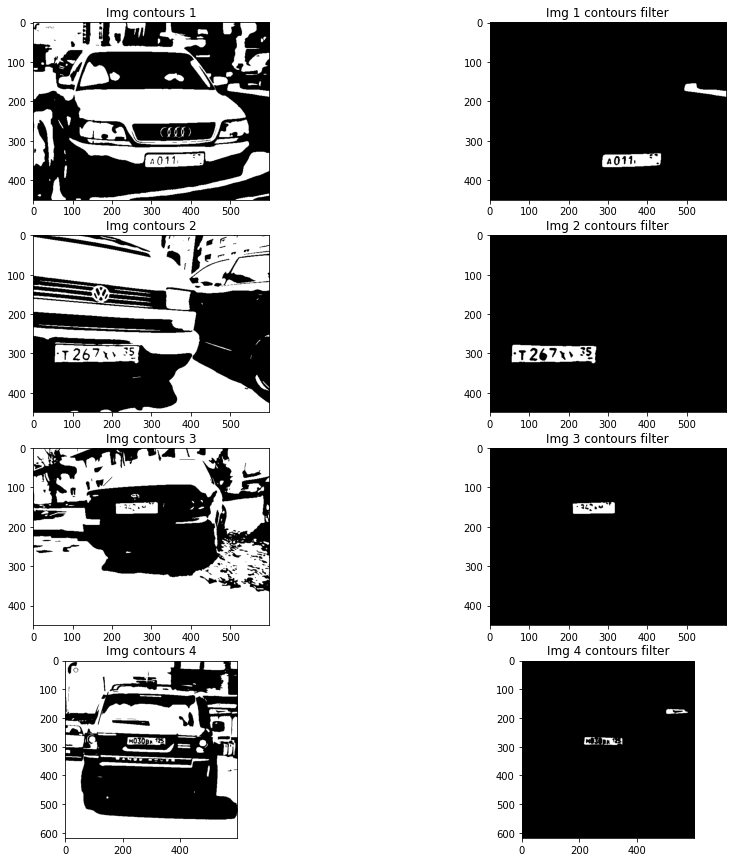

In [ ]:
limit_contours_imgs = limit_contours(contours_imgs, threshold_imgs)

fig, arreglo_plots = plt.subplots(len(limit_contours_imgs),2, figsize=(15, 15))
for i in range(len(limit_contours_imgs)):

  arreglo_plots[i,0].set_title(f'Img contours {i+1}')
  arreglo_plots[i,0].imshow(threshold_imgs[i], cmap="gray", vmin=0, vmax=255)


  arreglo_plots[i,1].set_title(f'Img {i+1} contours filter')
  arreglo_plots[i,1].imshow(limit_contours_imgs[i], cmap="gray", vmin=0, vmax=255)

Aplicamos una funcion de morphologia (morphologyEx) que en pocas palabras nos ayudara a unificar y/o rellenar contornos muy cercanos

In [ ]:
def apply_morphologyEx(img):
  thresh_gray = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (9,9)))


  return thresh_gray



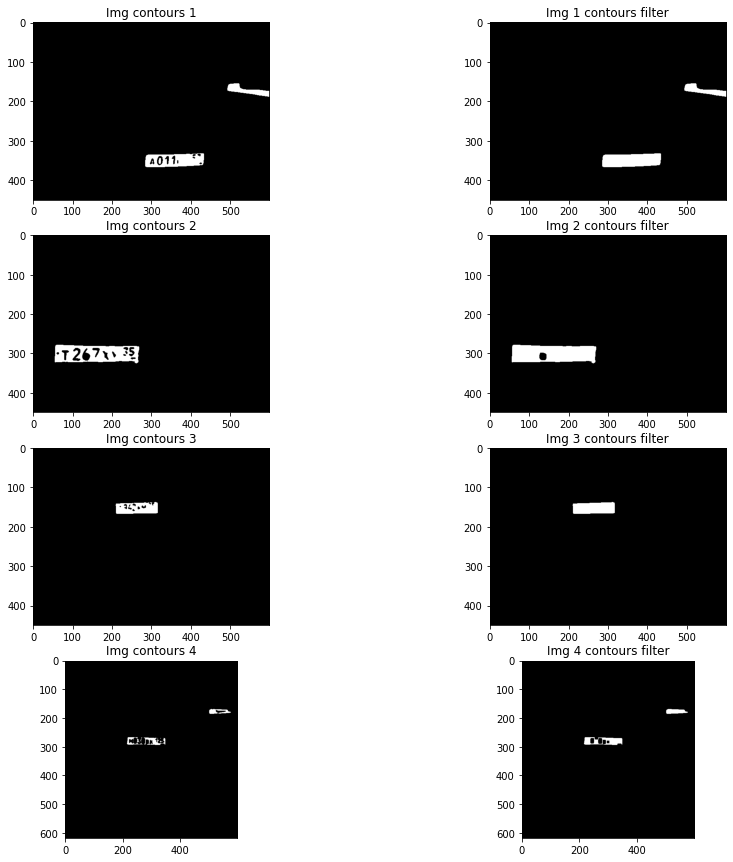

In [ ]:
morphologyEx_imgs = []

fig, arreglo_plots = plt.subplots(len(limit_contours_imgs),2, figsize=(15, 15))
for i, img in enumerate(limit_contours_imgs):
  arreglo_plots[i,0].set_title(f'Img contours {i+1}')
  arreglo_plots[i,0].imshow(limit_contours_imgs[i], cmap="gray", vmin=0, vmax=255)


  morphologyEx_img = apply_morphologyEx(img)
  morphologyEx_imgs.append(morphologyEx_img)


  arreglo_plots[i,1].set_title(f'Img {i+1} contours filter')
  arreglo_plots[i,1].imshow(morphologyEx_img, cmap="gray", vmin=0, vmax=255)


Aplicamos por segunda vez un filtro de contornos

In [ ]:
def limit_contours_2(thresh_gray):
  # Find contours in thresh_gray after closing the gaps
  contours = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]

  boxes = []

  for c in contours:
      area = cv2.contourArea(c)

      if  area < 500 or area > 10000:
          cv2.fillPoly(thresh_gray, pts=[c], color=0)
          continue

      rect = cv2.minAreaRect(c)
      (x, y), (w, h), angle = rect
      aspect_ratio = max(w, h) / min(w, h)

      bounding_rect = cv2.boundingRect(c)
      if aspect_ratio > 5 or (bounding_rect[2] < bounding_rect[3]  ) :
          cv2.fillPoly(thresh_gray, pts=[c], color=0)
          continue



      box = cv2.boxPoints(rect)
      box = np.int0(box)
      boxes.append(box)

  return boxes
      

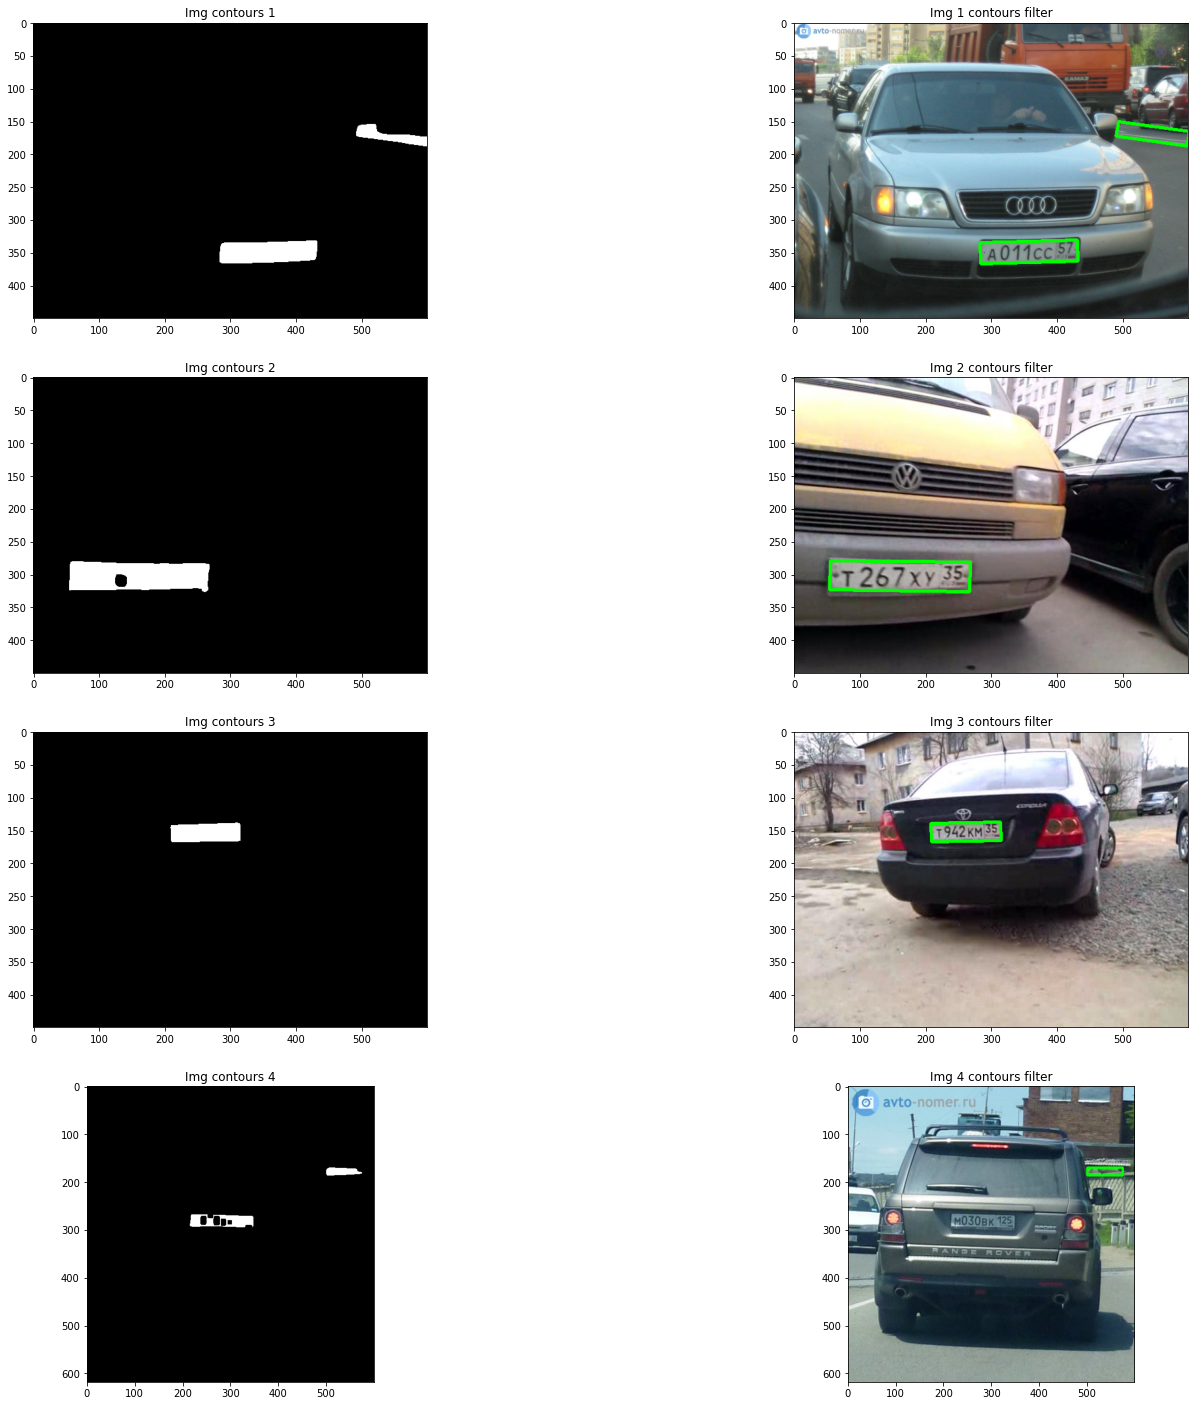

In [ ]:
final_filter_contours = []

fig, arreglo_plots = plt.subplots(len(limit_contours_imgs),2, figsize=(25, 25))
for i, limit_contours_img in enumerate(morphologyEx_imgs):
  arreglo_plots[i,0].set_title(f'Img contours {i+1}')
  arreglo_plots[i,0].imshow(limit_contours_img, cmap="gray", vmin=0, vmax=255)


  resized_img_copy = resized_imgs[i].copy()
  box_contours = limit_contours_2(limit_contours_img)
  for box in box_contours:
    cv2.drawContours(resized_img_copy, [box], 0, (0, 255, 0), 3)
  final_filter_contours.append(box_contours)


  arreglo_plots[i,1].set_title(f'Img {i+1} contours filter')
  arreglo_plots[i,1].imshow(resized_img_copy, cmap="gray", vmin=0, vmax=255)

## **Extracción de las placas**

Simplemente definimos unas funciones que nos ayudaran a obtener o recortar desde la imagen original, los contornos anteriormente filtrados

In [ ]:
def order_points(pts):
    pts = np.array(pts, dtype=np.float32)
    rect = np.zeros((4, 2), dtype = "float32")
    
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect


def four_point_transform(image, pts):
    
    rect = order_points(pts)
    
    tl, tr, br, bl = pts
    
    width_1 = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    width_2 = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    max_width = max(int(width_1), int(width_2))
    
    height_1 = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    height_2 = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    max_height = max(int(height_1), int(height_2))
    
    dst = np.array([
        [0, 0],
        [max_width, 0],
        [max_width, max_height],
        [0, max_height]], dtype = "float32")
    
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (max_width, max_height))
    return warped

In [ ]:
def cropped_plate(img, contour):
  height, width, _= img.shape
  scale = 600/width

  print(scale)
  x, y, w, h = cv2.boundingRect(contour)
  
  x = int(x/(scale))
  y = int(y/scale)
  w = int(w/scale)
  h = int(h/scale)

  box = [[x, y], [x+w, y], [x+w, y+h], [x, y+h]]
  
  image = img
  cropped = four_point_transform(image, box)
  
  return cropped



0.375
0.9375
0.9375
0.9404388714733543


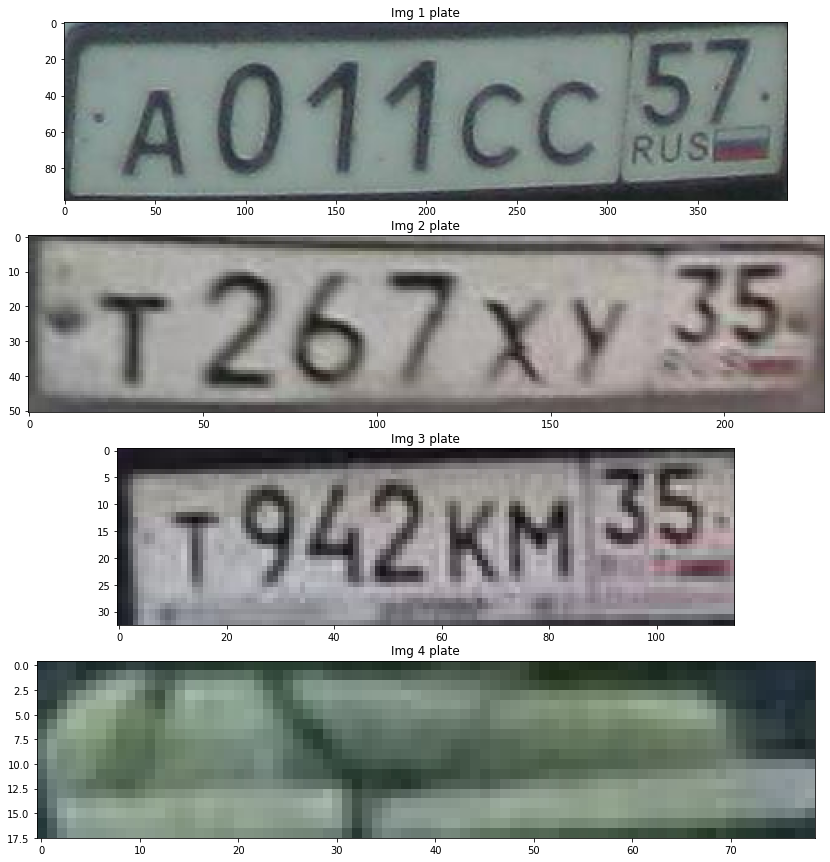

In [ ]:
all_cropped_plate = []

fig, arreglo_plots = plt.subplots(len(original_imgs),1, figsize=(15, 15))
for i in range(len(final_filter_contours)):
  if(len(final_filter_contours[i]) > 0):
    cropped = cropped_plate(original_imgs[i], final_filter_contours[i][0])

    all_cropped_plate.append(cropped)


    arreglo_plots[i].set_title(f'Img {i+1} plate')
    arreglo_plots[i].imshow(cropped, cmap="gray", vmin=0, vmax=255)

Desde aquí empazaría el procesamiento de los recortes de la placa, para tratar de obtener solo los caracteres en dicha imagen.

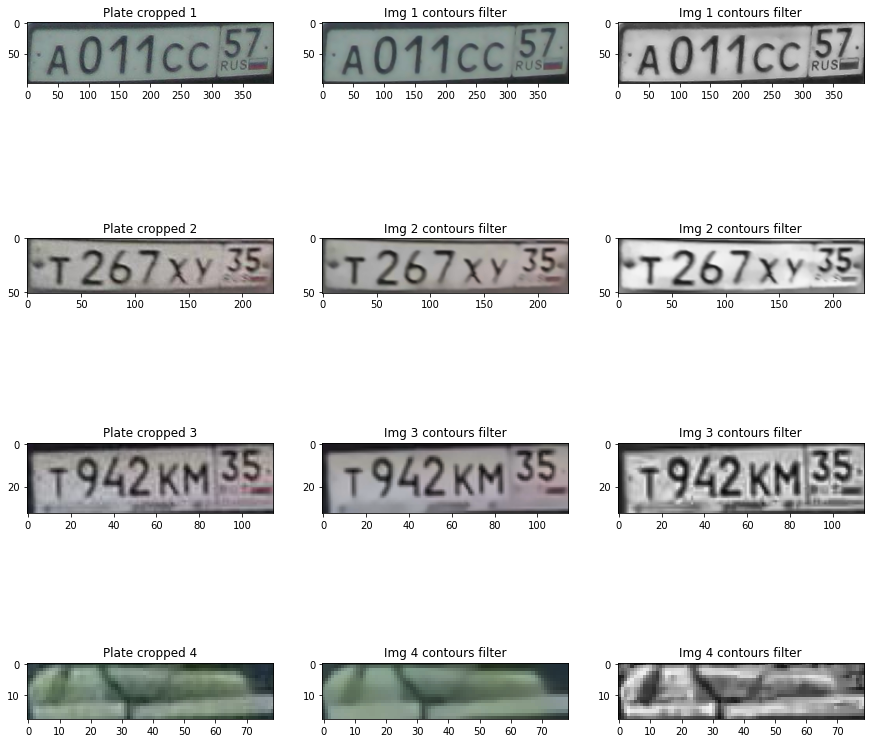

In [ ]:
cropped_imgs_promedio_no_local_colored = []
cropped_imgs_promedio_no_local = []


fig2, arreglo_plots = plt.subplots(4,3, figsize=(15, 15))
for i, plate_cropped in enumerate(all_cropped_plate):
  arreglo_plots[i,0].set_title(f'Plate cropped {i+1}')
  arreglo_plots[i,0].imshow(plate_cropped, cmap="gray", vmin=0, vmax=255)

  new = cv2.cvtColor(plate_cropped, cv2.COLOR_RGB2GRAY)
  noiseless_image_colored = cv2.fastNlMeansDenoisingColored(plate_cropped,None,10,10,3, 7) 
  noiseless_image_bw = cv2.fastNlMeansDenoising(clhe(new), None, 15, 3, 11) 

  cropped_imgs_promedio_no_local_colored.append(noiseless_image_colored)
  cropped_imgs_promedio_no_local.append(noiseless_image_bw)

  arreglo_plots[i,1].set_title(f'Img {i+1} contours filter')
  arreglo_plots[i,1].imshow(noiseless_image_colored, cmap="gray", vmin=0, vmax=255)

  arreglo_plots[i,2].set_title(f'Img {i+1} contours filter')
  arreglo_plots[i,2].imshow(noiseless_image_bw, cmap="gray", vmin=0, vmax=255)

Aplicamos el treshold a los recortes

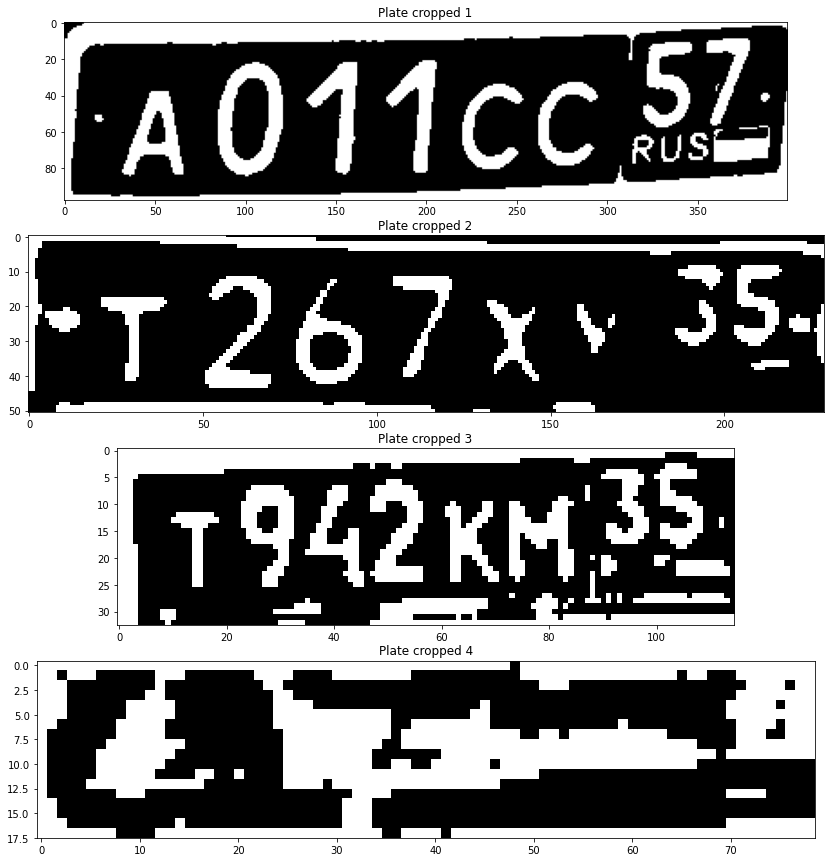

In [ ]:
thresh_plates = []

fig2, arreglo_plots = plt.subplots(4, figsize=(15, 15))
for i, cropped_img in enumerate(cropped_imgs_promedio_no_local):

  thresh = cv2.threshold(cropped_img, 120, 255, cv2.THRESH_BINARY_INV)[1]
  thresh_plates.append(thresh)

  arreglo_plots[i].set_title(f'Plate cropped {i+1}')
  arreglo_plots[i].imshow(thresh, cmap="gray", vmin=0, vmax=255)



Limpiamos los bordes.

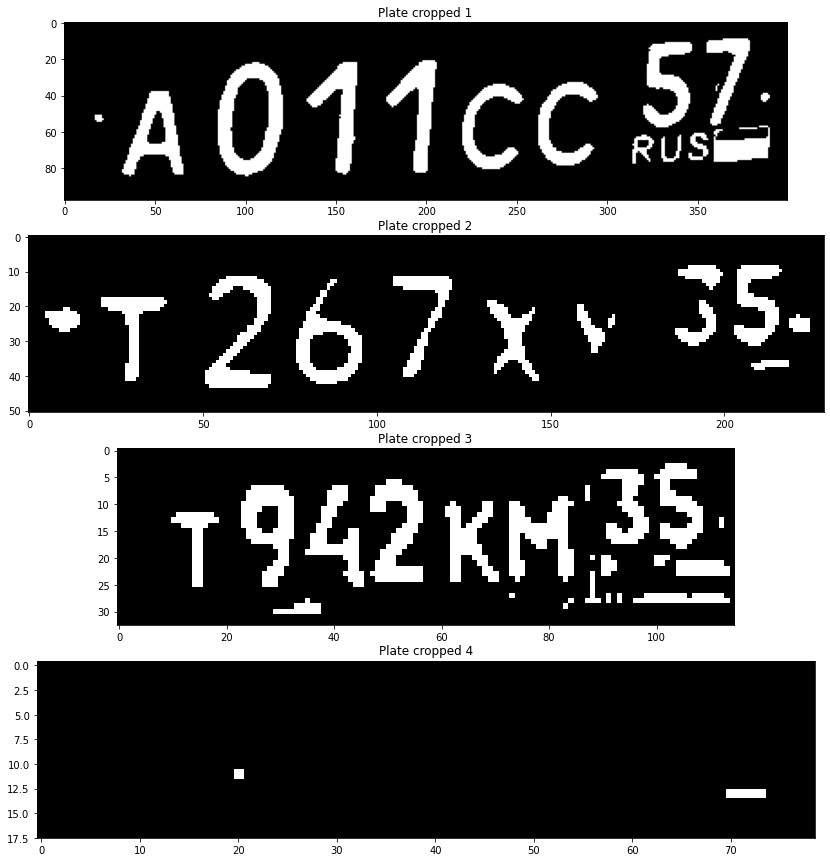

In [ ]:
clear_border_plates = []

fig2, arreglo_plots = plt.subplots(4, figsize=(15, 15))
for i, thresh_plate in enumerate(thresh_plates):

  borderless1 = clear_border(thresh_plate)
  clear_border_plates.append(borderless1)

  arreglo_plots[i].set_title(f'Plate cropped {i+1}')
  arreglo_plots[i].imshow(borderless1, cmap="gray", vmin=0, vmax=255)

Invertimos nuevamente los pixeles, pero usando la funcion bitwise_not de opencv.

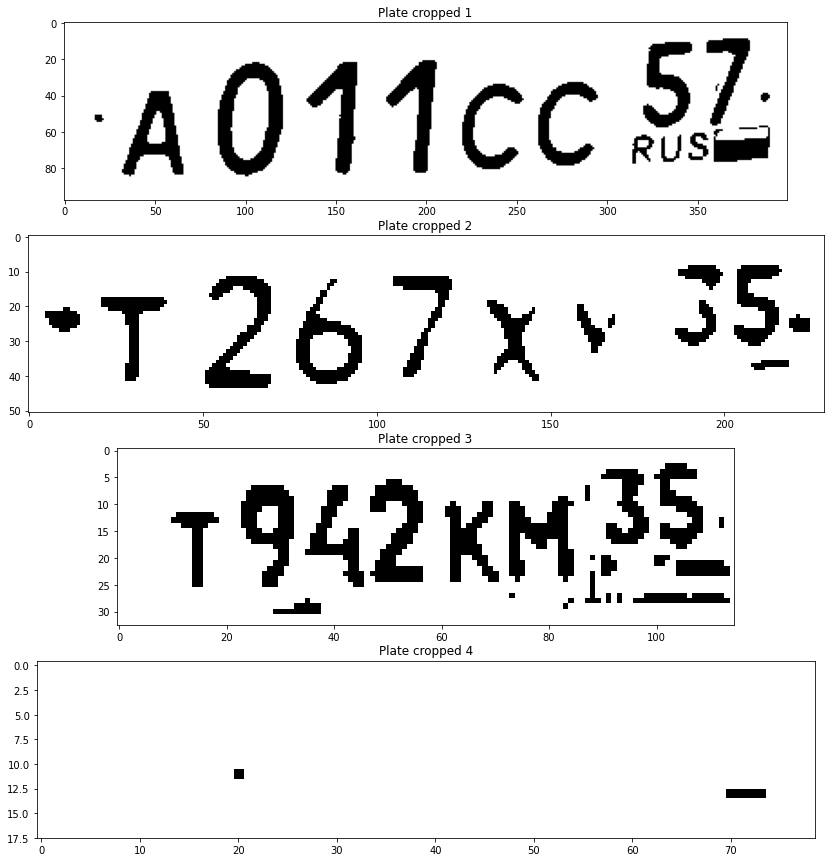

In [ ]:
final_plates = []


fig2, arreglo_plots = plt.subplots(4, figsize=(15, 15))
for i, plate in enumerate(clear_border_plates):

  final = cv2.bitwise_not(plate)
  final_plates.append(final)

  arreglo_plots[i].set_title(f'Plate cropped {i+1}')
  arreglo_plots[i].imshow(final, cmap="gray", vmin=0, vmax=255)

# **OCR**





## **Preparacion del modulo para lectura de caracteres (OCR)**

In [ ]:
reader = easyocr.Reader(['en'], gpu=True)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## **Extraccion de caracteres**

In [ ]:
all_characters_extraction = []

for plate in final_plates:

  bounds = reader.readtext(plate, allowlist="01234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ", paragraph=True, min_size = 80, contrast_ths= 0.5)
  all_characters_extraction.append(bounds)
  print(bounds)

[[[[28, 0], [400, 0], [400, 96], [28, 96]], 'AOM1CC52']]
[[[[17, 5], [225, 5], [225, 49], [17, 49]], 'T267XY35']]
[[[[17, 0], [115, 0], [115, 33], [17, 33]], '942KMZS']]
[]


## **Dibujar recuadro de la lectura de caractares**

In [ ]:

def draw_boxes(image, bounds, color=(0, 0, 255), width=2):
    image = image.copy()
    for bound in bounds:
      cv2.rectangle(image, bound[0][0], bound[0][2], color, width)
      
    return image


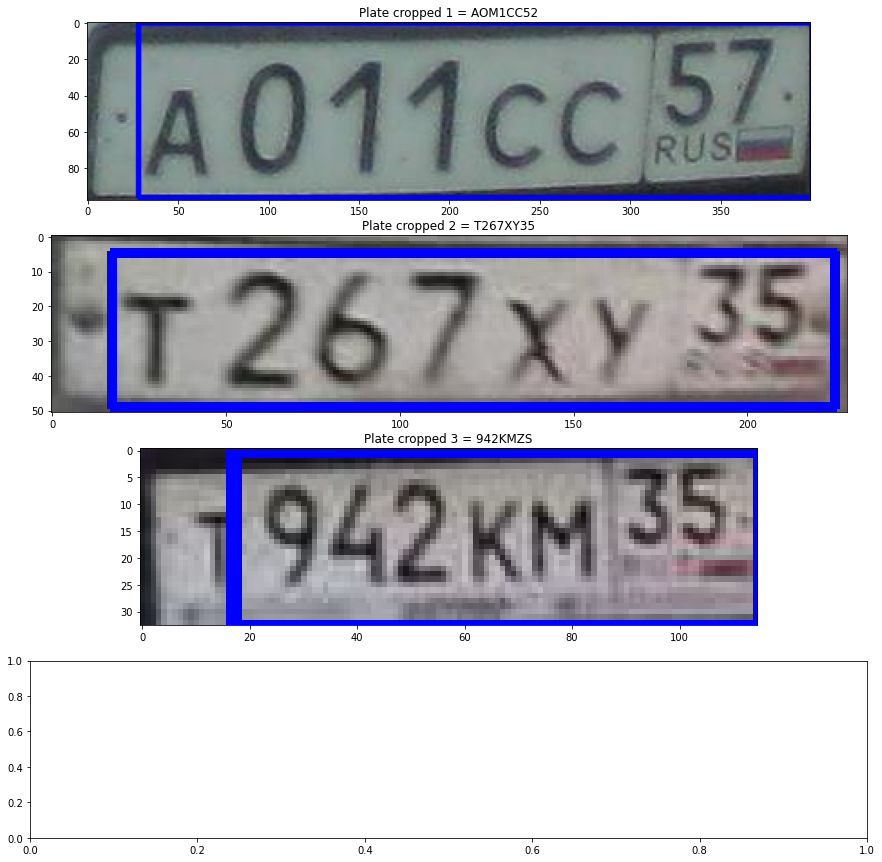

In [ ]:

fig2, arreglo_plots = plt.subplots(4, figsize=(15, 15))
for i, plate in enumerate(all_cropped_plate):

  if(len(all_characters_extraction[i])>0):

    draw = draw_boxes(plate, all_characters_extraction[i])

    arreglo_plots[i].set_title(f'Plate cropped {i+1} = {all_characters_extraction[i][0][1]}')
    arreglo_plots[i].imshow(draw, cmap="gray", vmin=0, vmax=255)

# **Conclusiones**

Como conclusiones, tenemos que es realmente complicado implementar técnicas visión artificial sobre un dataset con condiciones tan variadas como:


1.   Que unas imagenes con mucho brillo, otras lo contrario.
2.   Suciedad en las placas.
3.   Calidad de imagenes
4.   Que tan cerca o lejos se encuentre la placa.

Entre muchas otras, aún así creemos que se logro un buen objetivo a la hora de implementar dichas técnicas.

En cuanto al OCR si fue lo mas complicado, aunque se lograra extraer de forma correcta una placa, este no era capaz de obtener de forma acertada todos los carácteres.